In [1]:
##importing the libraries


import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
#importing the data set


credit_data=pd.read_csv("C://Users//rahul//OneDrive//Desktop//ML_DS//Pandas_Practice//ML_Data//Credit_default_dataset.csv")

In [3]:
credit_data.shape

(30000, 25)

In [4]:
pd.set_option('display.max_columns', None)  
credit_data.head(1)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1


In [5]:
credit_data[credit_data['default.payment.next.month']== 0].head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,0,0,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,0,0,367965.0,412023.0,445007.0,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0


In [6]:
#rename the target column

In [7]:
credit_data.rename(columns={'default.payment.next.month':'default'}, inplace=True)

In [8]:

##quick info


credit_data.info()

#we can see that there is pay_1 is missing, ie replayment status for month of august
#all the features are not null, which is convinient
#ID column seems to be a feature that gives no real info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID           30000 non-null int64
LIMIT_BAL    30000 non-null float64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null float64
BILL_AMT2    30000 non-null float64
BILL_AMT3    30000 non-null float64
BILL_AMT4    30000 non-null float64
BILL_AMT5    30000 non-null float64
BILL_AMT6    30000 non-null float64
PAY_AMT1     30000 non-null float64
PAY_AMT2     30000 non-null float64
PAY_AMT3     30000 non-null float64
PAY_AMT4     30000 non-null float64
PAY_AMT5     30000 non-null float64
PAY_AMT6     30000 non-null float64
default      30000 non-null int64
dtypes: float64

In [9]:
#getting a feel of the data
credit_data.head()  

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [10]:
credit_data.describe().transpose()

#mean of default payment (target_varirable) is 0.22. So on average 22% of the instances defaulted
#so we have class imbalance

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [11]:
##reassuring prev observation 

credit_data['default'].value_counts()

0    23364
1     6636
Name: default, dtype: int64

In [12]:
credit_data.groupby(['default'])['default'].count()

default
0    23364
1     6636
Name: default, dtype: int64

In [13]:
##so only about 6600 out of 30,000 ppl are defaulters(class 1) which is around 22%

In [14]:
#similary lets check other attributes

In [15]:
credit_data.columns.values

array(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'default'], dtype=object)

In [16]:
# we can see a lot of the customers are females (1 -male , 2 - female)
credit_data['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [17]:
#almost same proportion of single (2) and married folks (1)

credit_data['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [18]:
#grad and univ educated folks dominate our data set

credit_data['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [19]:
##some stats of the credit in dollars that has be lent to the population in our dataset

credit_data['LIMIT_BAL'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

In [20]:
#avg age is around 35, and ,min of 21 yrs old

credit_data['AGE'].describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

In [21]:
#looking at monthly repayment status for month of august
# so majority of them are clean

credit_data['PAY_0'].value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64

In [22]:
credit_data['PAY_2'].value_counts()

 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64

In [ ]:
##check for nulls columns wise

In [23]:
credit_data.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

In [24]:
#using a lambda funtion for the same

null_per_feature= lambda x: x.isnull().sum()

In [25]:
#apply to data set

credit_data.apply(null_per_feature)

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

In [26]:
##lets analyize visually the data set

#to see data distributions
#1.df.hist() 
#to see correlation between features
#1.df.corr() #corr matrix (only measures linear correlation)
#2.scatter_matrix(df)

In [27]:
credit_data.columns.values

array(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'default'], dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028B541B9630>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000028B55A79518>]], dtype=object)

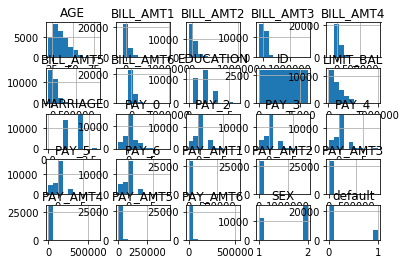

In [28]:

%matplotlib inline
credit_data.hist()

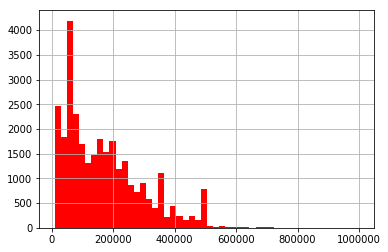

In [29]:
##lets see data distributions feature wise one by one


#limit bal distribution
credit_data['LIMIT_BAL'].hist(bins =50, color = 'red' )

#so most of the csutomer credits are clustered $50,000 -400,000

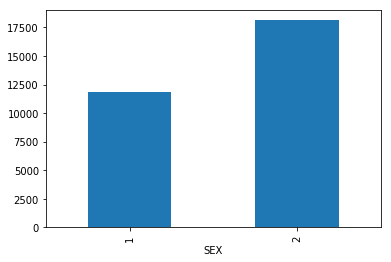

In [30]:
#gender distribution, 1 - females, 2 -males

credit_data.groupby(['SEX']).size().plot(kind = 'bar')

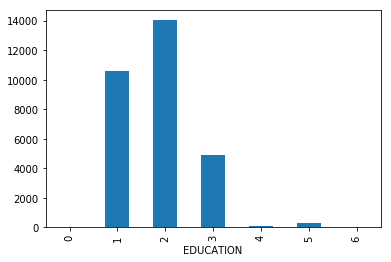

In [31]:
#1-grad , 2- univ

#credit_data.groupby(['EDUCATION']).size().plot(kind = 'bar', color = 'orange')

credit_data.groupby(['EDUCATION']).size().plot(kind = 'bar')

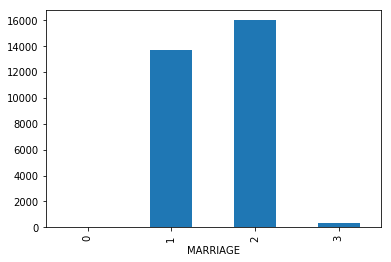

In [32]:
#1 - married, 2 -single

credit_data.groupby(['MARRIAGE']).size().plot(kind = 'bar')

34.0

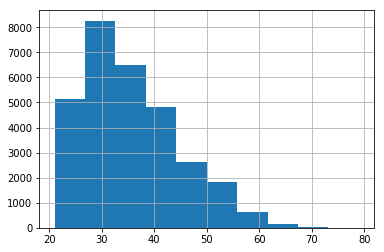

In [33]:
#age distribution

#most data around 22- 40 yrs
credit_data['AGE'].hist(bins =10)

credit_data['AGE'].median()

In [34]:
credit_data['LIMIT_BAL'].median()

140000.0

In [35]:
credit_data['LIMIT_BAL'].max()

1000000.0

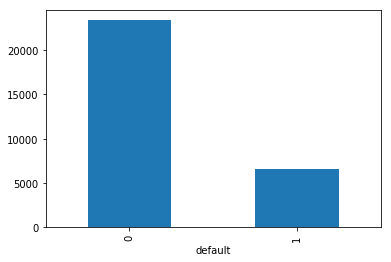

In [36]:
##visualizing class imbalance

credit_data.groupby(['default']).size().plot(kind = 'bar')

In [ ]:
##correlations 

In [37]:
lin_corr_matrix= credit_data.corr()

In [38]:
lin_corr_matrix

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
ID,1.000000,0.026179,0.018497,0.039177,-0.029079,0.018678,-0.030575,-0.011215,-0.018494,-0.002735,-0.022199,-0.020270,0.019389,0.017982,0.024354,0.040351,0.016705,0.016730,0.009742,0.008406,0.039151,0.007793,0.000652,0.003000,-0.013952
LIMIT_BAL,0.026179,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,-0.235195,0.285430,0.278314,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
SEX,0.018497,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,-0.055064,-0.044008,-0.033642,-0.031183,-0.024563,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
EDUCATION,0.039177,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,0.097520,0.082316,0.023581,0.018749,0.013002,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200,0.028006
MARRIAGE,-0.029079,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,0.035629,0.034345,-0.023472,-0.021602,-0.024909,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,-0.024339
AGE,0.018678,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,-0.048773,0.056239,0.054283,0.053710,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
PAY_0,-0.030575,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,0.474553,0.187068,0.189859,0.179785,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
PAY_2,-0.011215,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,0.575501,0.234887,0.235257,0.224146,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
PAY_3,-0.018494,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,0.632684,0.208473,0.237295,0.227494,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
PAY_4,-0.002735,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,0.716449,0.202812,0.225816,0.244983,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614


In [39]:
##looking at what features correlate +vely/-vely with the target variable default payment

#looking at correlations this way for discrete or encoded features does not make sense, because
#they are categorical features

#but it makes sense to look for entries of numerical attributes like age

# 0.013 is a very weak or there is no correlation between age and default

lin_corr_matrix['default']

ID          -0.013952
LIMIT_BAL   -0.153520
SEX         -0.039961
EDUCATION    0.028006
MARRIAGE    -0.024339
AGE          0.013890
PAY_0        0.324794
PAY_2        0.263551
PAY_3        0.235253
PAY_4        0.216614
PAY_5        0.204149
PAY_6        0.186866
BILL_AMT1   -0.019644
BILL_AMT2   -0.014193
BILL_AMT3   -0.014076
BILL_AMT4   -0.010156
BILL_AMT5   -0.006760
BILL_AMT6   -0.005372
PAY_AMT1    -0.072929
PAY_AMT2    -0.058579
PAY_AMT3    -0.056250
PAY_AMT4    -0.056827
PAY_AMT5    -0.055124
PAY_AMT6    -0.053183
default      1.000000
Name: default, dtype: float64

In [40]:
##another way to see correlations

In [41]:
credit_data['AGE'][credit_data['default'] ==1].describe()

count    6636.000000
mean       35.725738
std         9.693438
min        21.000000
25%        28.000000
50%        34.000000
75%        42.000000
max        75.000000
Name: AGE, dtype: float64

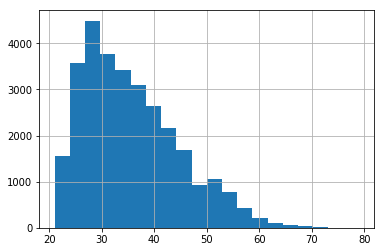

In [42]:
#distributions of age in our data
#data clustered around age 20 - 40 

credit_data['AGE'].hist(bins = 20)

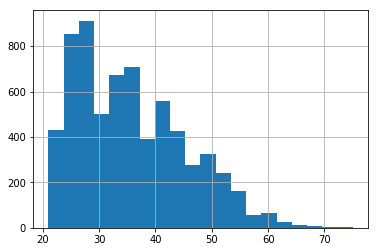

In [43]:
#is age related to default? 
# i.e. can we say that a particular age group tends to defualt more? 

#we see that the count of defaulters are high in age group 20 -40 years
#but this is not suprising since majority of our data's age also lies between 20 -40 
#as observed in above dist of just age


#below plots age distribution for just defaulters

credit_data['AGE'][credit_data['default']==1].hist(bins =20)

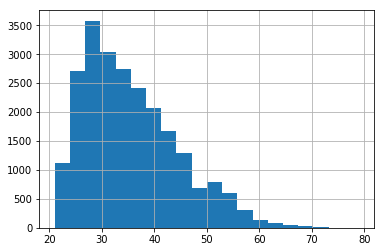

In [44]:
#age distribution for non defaulters
#again no suprises

credit_data['AGE'][credit_data['default']== 0].hist(bins = 20)

In [ ]:
##lets see if a certain gender tends to default more?


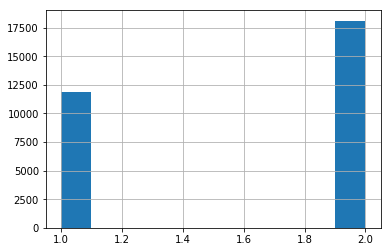

In [45]:
#so our data has more females than males

credit_data['SEX'].hist()

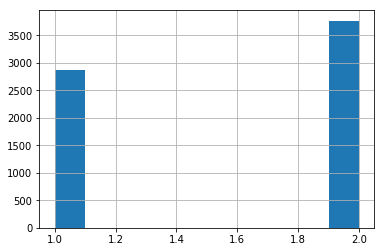

In [46]:
##graph plots gender vs defaulters count

credit_data['SEX'][credit_data['default']==1].hist()

In [47]:
##checking the ratio

n_males=credit_data['SEX'][credit_data['SEX']==1].count()
n_males
#n_males/30000 ie. 40% of the population is males

11888

In [48]:
n_females=credit_data['SEX'][credit_data['SEX']==2].count()
n_females

#n_females/30000 i.e. 60% of the population is females

18112

In [49]:
#male and defaulted

n_males_d=credit_data['SEX'][credit_data['SEX']==1][credit_data['default']==1].count()
n_males_d

2873

In [50]:
#female and defaulted

n_females_d= credit_data['SEX'][credit_data['SEX']==2][credit_data['default']==1].count()
n_females_d

3763

In [51]:
#percentage of men defaulters

(n_males_d/n_males)*100

#so around 24% of male population defaulted, even though they have less over all samples in the 
#total population

24.167227456258409

In [52]:
#percentage of female defaulters

(n_females_d/n_females)*100

#and around 20% female population defaulted, even though they have more over all samples in 
#toal population

20.776280918727917

In [53]:
## we can maybe say that men tend to default a bit more, since the overall samples of men is 
#less still their default percent is higher

In [54]:
total_defaulters =credit_data['default'][credit_data['default']==1].count()
total_defaulters


6636

In [55]:
##out of the defaulters population, 43% is males and 56% is females. But we cant say females 
#are more prone to defauting since, 60% of overall population is females.

n_males_d/total_defaulters

0.43294153104279687

In [56]:
n_females_d/total_defaulters

0.56705846895720313

In [57]:
##does education have an effect ?


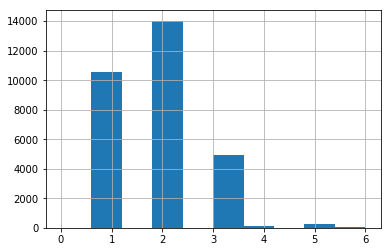

In [58]:
#1 - grad, 2 - univ

credit_data['EDUCATION'].hist()

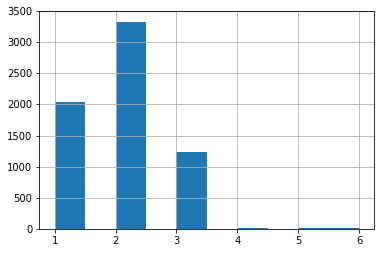

In [59]:
credit_data['EDUCATION'][credit_data['default']==1].hist()

In [ ]:
#nothing stands out here as well

In [ ]:
#lets look at marriage 

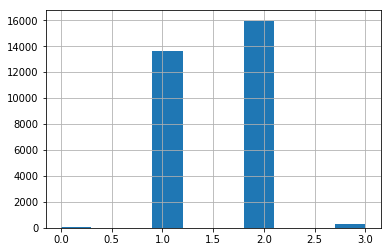

In [60]:
#1 - married, 2  - single

credit_data['MARRIAGE'].hist()

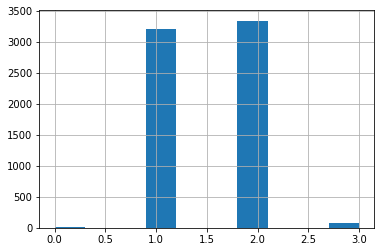

In [61]:
#defauters in different martial status groups 

credit_data['MARRIAGE'][credit_data['default']==1].hist()

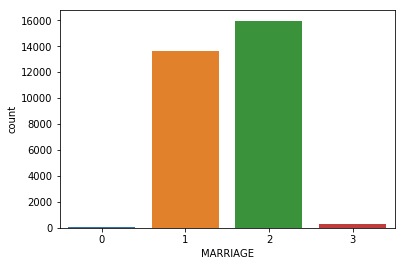

In [62]:
 import seaborn as sb


sb.countplot(data= credit_data, x = 'MARRIAGE')


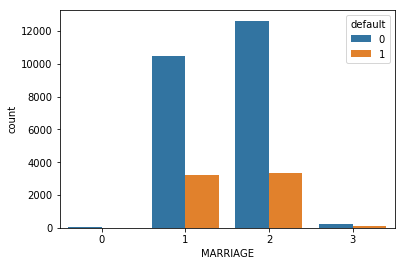

In [63]:
##another way to use histogram to see correlations use sb.countplot()

##  import seaborn as sb


sb.countplot(data= credit_data, x = 'MARRIAGE', hue= 'default')


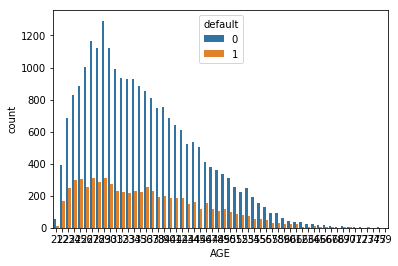

In [64]:
sb.countplot(data=credit_data, x = 'AGE', hue = 'default')

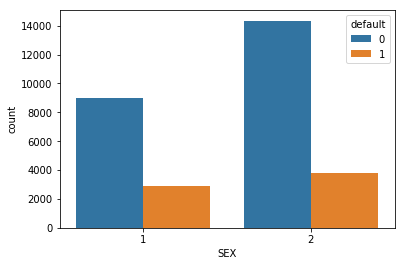

In [65]:
sb.countplot(data = credit_data, x = 'SEX', hue= 'default')

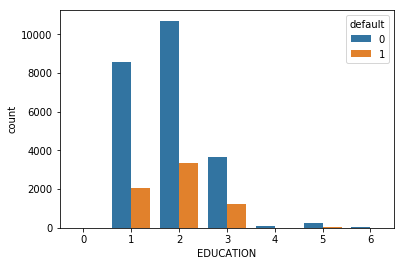

In [66]:
sb.countplot(data = credit_data, x = 'EDUCATION', hue= 'default')

In [67]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID           30000 non-null int64
LIMIT_BAL    30000 non-null float64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null float64
BILL_AMT2    30000 non-null float64
BILL_AMT3    30000 non-null float64
BILL_AMT4    30000 non-null float64
BILL_AMT5    30000 non-null float64
BILL_AMT6    30000 non-null float64
PAY_AMT1     30000 non-null float64
PAY_AMT2     30000 non-null float64
PAY_AMT3     30000 non-null float64
PAY_AMT4     30000 non-null float64
PAY_AMT5     30000 non-null float64
PAY_AMT6     30000 non-null float64
default      30000 non-null int64
dtypes: float64

In [68]:
credit_data.rename(columns={'PAY_0':'PAY_1'}, inplace=True)

In [69]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID           30000 non-null int64
LIMIT_BAL    30000 non-null float64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_1        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null float64
BILL_AMT2    30000 non-null float64
BILL_AMT3    30000 non-null float64
BILL_AMT4    30000 non-null float64
BILL_AMT5    30000 non-null float64
BILL_AMT6    30000 non-null float64
PAY_AMT1     30000 non-null float64
PAY_AMT2     30000 non-null float64
PAY_AMT3     30000 non-null float64
PAY_AMT4     30000 non-null float64
PAY_AMT5     30000 non-null float64
PAY_AMT6     30000 non-null float64
default      30000 non-null int64
dtypes: float64

In [70]:
##Data preprocessing

#1.Feature Engineering
#2.Nulls/ outliers
#3.encoding
#4.scaling

In [71]:
#Some features like ID give no information and is a redudant feature. 

In [72]:
#droping ID column

credit_data.drop(['ID'],axis= 1, inplace= True)

In [73]:
credit_data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [74]:
#education has 7 levels 0..6, but only levels 1,2,3 are significant. 
#Remanning levels can be collapsed into a single level 4.


credit_data['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

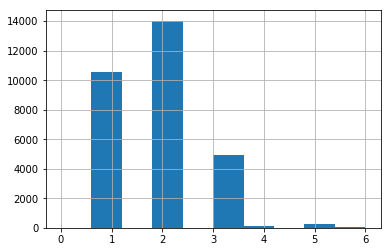

In [75]:
credit_data['EDUCATION'].hist()

In [76]:
#collapsing

credit_data['EDUCATION']=credit_data['EDUCATION'].map({0:4, 1:1, 2:2, 3:3, 4:4, 5:4, 6:4})

In [77]:
credit_data['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [78]:
## same for MARRIAGE

credit_data['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

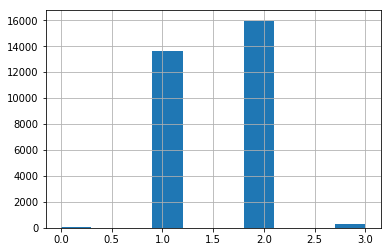

In [79]:
#again here 1(married) and 2(single) levels are significant, remaining can be collapesed as 3(others).

credit_data['MARRIAGE'].hist()

In [80]:
credit_data['MARRIAGE']= credit_data['MARRIAGE'].map({0:3, 1:1,2:2, 3:3})

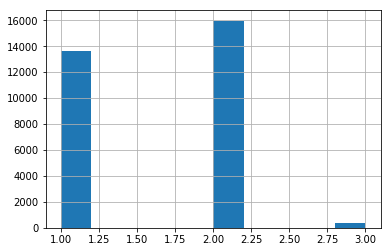

In [81]:
credit_data['MARRIAGE'].hist()

In [82]:
#checking for nulls 

credit_data.isnull().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

In [83]:
#no nulls which is good.

In [119]:
X=credit_data.drop(['default'], axis =1)

In [120]:
X

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
5,50000.0,1,1,2,37,0,0,0,0,0,0,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0
6,500000.0,1,1,2,29,0,0,0,0,0,0,367965.0,412023.0,445007.0,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0
7,100000.0,2,2,2,23,0,-1,-1,0,0,-1,11876.0,380.0,601.0,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0
8,140000.0,2,3,1,28,0,0,2,0,0,0,11285.0,14096.0,12108.0,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0
9,20000.0,1,3,2,35,-2,-2,-2,-2,-1,-1,0.0,0.0,0.0,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0


In [122]:
y = credit_data['default']

In [123]:
X.shape

(30000, 23)

In [124]:
y.shape

(30000,)

In [148]:
#spliting data into train and test

from sklearn.model_selection import train_test_split

In [149]:
X_train,X_test, y_train, y_test=train_test_split(X, y, test_size = 0.3)

In [151]:
X_train.shape

(21000, 23)

In [152]:
y_train.shape

(21000,)

In [153]:
X_test.shape

(9000, 23)

In [155]:
y_test.shape

(9000,)

In [ ]:
##scaling just on train data

In [156]:
from sklearn.preprocessing import MinMaxScaler

scaler_x = MinMaxScaler()
X_train_scaled= scaler_x.fit_transform(X_train)

In [158]:
#using scaling parameters of train data to transform test data

X_test_scaled= scaler_x.transform(X_test)

In [ ]:
####train and test data split ready###
X_train_scaled, y_train, X_test_scaled, y_test


In [ ]:
##train build models

#starting with benchmark model - Logistics regression

In [170]:
from sklearn.linear_model import LogisticRegression

In [171]:
log_reg_cls= LogisticRegression(random_state=42)

In [172]:
from sklearn.model_selection import cross_validate

In [174]:
scoring_metrics= {'acc_score':'accuracy', 'pre_score':'precision_weighted', 'recall_score':'recall_weighted', 'f1_score': 'f1_weighted'}

In [176]:
#cross validate on train data to see which models show promise
#for promising models tune hyper parameters
#for promising models that are tuned  predict on test data.

#cross val log reg on train data to see metrics like accuracy, weighted precision, weighted recall, weighted f1 score


log_reg_metrics=cross_validate(log_reg_cls, X_train_scaled, y_train, cv=10, scoring=scoring_metrics)

In [178]:
log_reg_metrics.keys()

dict_keys(['fit_time', 'score_time', 'test_acc_score', 'train_acc_score', 'test_pre_score', 'train_pre_score', 'test_recall_score', 'train_recall_score', 'test_f1_score', 'train_f1_score'])

In [180]:
log_reg_metrics['test_acc_score']

array([ 0.80818658,  0.81151832,  0.8152381 ,  0.82      ,  0.8152381 ,
        0.81      ,  0.81      ,  0.81761905,  0.81181515,  0.81181515])

In [182]:
log_reg_acc=np.mean(log_reg_metrics['test_acc_score'])
log_reg_acc

0.81314304406655791

In [183]:
log_reg_metrics['test_pre_score']

array([ 0.79169364,  0.79311495,  0.80378288,  0.80545455,  0.80188612,
        0.79043418,  0.79308883,  0.80789966,  0.7971186 ,  0.79581043])

In [185]:
log_reg_precision=np.mean(log_reg_metrics['test_pre_score'])
log_reg_precision

0.79802838395028997

In [186]:
log_reg_metrics['test_recall_score']

array([ 0.80818658,  0.81151832,  0.8152381 ,  0.82      ,  0.8152381 ,
        0.81      ,  0.81      ,  0.81761905,  0.81181515,  0.81181515])

In [188]:
log_reg_recall= np.mean(log_reg_metrics['test_recall_score'])

log_reg_recall

0.81314304406655791

In [191]:
log_reg_f1= np.mean(log_reg_metrics['test_f1_score'])
log_reg_f1

0.77248260624640974

In [ ]:


###Random forest

In [192]:
from sklearn.ensemble import RandomForestClassifier

In [193]:
rf_cls= RandomForestClassifier(random_state= 42)

In [194]:
rf_cls_metrics = cross_validate(rf_cls, X_train_scaled, y_train, cv = 10 , scoring= scoring_metrics)

In [196]:
rf_cls_metrics['test_acc_score']

array([ 0.80199905,  0.80199905,  0.80857143,  0.81      ,  0.81904762,
        0.80619048,  0.80809524,  0.8147619 ,  0.80657456,  0.80848023])

In [198]:
rf_cls_acc= np.mean(rf_cls_metrics['test_acc_score'])
rf_cls_acc

0.80857195508056434

In [199]:
rf_cls_metrics['test_pre_score']

array([ 0.77559902,  0.77852823,  0.78533813,  0.78797028,  0.80027646,
        0.78437111,  0.78492081,  0.79414455,  0.78233765,  0.78535552])

In [200]:
rf_cls_precision= np.mean(rf_cls_metrics['test_pre_score'])
rf_cls_precision

0.78588417630730834

In [201]:
rf_cls_metrics['test_recall_score']

array([ 0.80199905,  0.80199905,  0.80857143,  0.81      ,  0.81904762,
        0.80619048,  0.80809524,  0.8147619 ,  0.80657456,  0.80848023])

In [203]:
rf_cls_recall= np.mean(rf_cls_metrics['test_recall_score'])
rf_cls_recall

0.80857195508056434

In [205]:
rf_cls_f1=np.mean(rf_cls_metrics['test_f1_score'])
rf_cls_f1

0.78516416327020855

In [206]:
## Adaboost

from sklearn.ensemble import AdaBoostClassifier

In [207]:
adaboost_cls= AdaBoostClassifier(random_state= 42)

In [208]:
ada_metrics  = cross_validate(adaboost_cls, X_train_scaled, y_train, cv =10 , scoring= scoring_metrics)

In [209]:
ada_accuracy = np.mean(ada_metrics['test_acc_score'])
ada_accuracy

0.82119136700160578

In [211]:
ada_precision = np.mean(ada_metrics['test_pre_score'])
ada_precision

0.80388059072608919

In [212]:
ada_recall = np.mean(ada_metrics['test_recall_score'])
ada_recall

0.82119136700160578

In [214]:
ada_f1= np.mean(ada_metrics['test_f1_score'])

ada_f1

0.79519406355385758

In [ ]:
##grad boost

In [215]:
from sklearn.ensemble import GradientBoostingClassifier

In [216]:
grad_boost_cls= GradientBoostingClassifier(random_state= 42)

In [217]:
grad_boost_metrics= cross_validate(grad_boost_cls, X_train_scaled, y_train, cv = 10 , scoring= scoring_metrics)

In [218]:
grad_boost_acc= np.mean(grad_boost_metrics['test_acc_score'])

grad_boost_acc

0.82490522214674089

In [219]:
grad_boost_precision= np.mean(grad_boost_metrics['test_pre_score'])

In [220]:
grad_boost_precision

0.80842287676840918

In [221]:
grad_boost_recall = np.mean(grad_boost_metrics['test_recall_score'])
grad_boost_recall

0.82490522214674089

In [222]:
grad_boost_f1 =np.mean( grad_boost_metrics['test_f1_score'])

grad_boost_f1

0.80374845909208248

In [ ]:
#voting classifier composed of estimators - random forest, ada, grad boost.
#using hard voting

In [223]:
from sklearn.ensemble import VotingClassifier

In [224]:
voting_cls= VotingClassifier(estimators= [('rf_cls', rf_cls),('adaboost_cls',adaboost_cls ),('gradboost_cls', grad_boost_cls) ])

In [225]:
voting_cls_metrics = cross_validate(voting_cls, X_train_scaled, y_train, cv = 10,scoring= scoring_metrics)

In [227]:
voting_cls_acc= np.mean(voting_cls_metrics['test_acc_score'])

voting_cls_acc

0.82471504068692203

In [228]:
voting_cls_precision = np.mean(voting_cls_metrics['test_pre_score'])  

voting_cls_precision

0.80858732710446635

In [229]:
voting_cls_recall = np.mean(voting_cls_metrics['test_recall_score'])  

voting_cls_recall

0.82471504068692203

In [230]:
voting_cls_f1=np.mean(voting_cls_metrics['test_f1_score'])
voting_cls_f1

0.80120499758412222

In [ ]:
## lets compare each of the models on their accuracy , precision , recall and f1 scores

In [231]:
## comparing accuracy for all models

accuracy_list = []

accuracy_list.append(log_reg_acc)
accuracy_list.append(rf_cls_acc)
accuracy_list.append(ada_accuracy)
accuracy_list.append(grad_boost_acc)
accuracy_list.append(voting_cls_acc)

In [232]:
accuracy_list

[0.81314304406655791,
 0.80857195508056434,
 0.82119136700160578,
 0.82490522214674089,
 0.82471504068692203]

In [233]:
##comapring weighted precision
precision_list = []

precision_list.append(log_reg_precision)
precision_list.append(rf_cls_precision)
precision_list.append(ada_precision)
precision_list.append(grad_boost_precision)
precision_list.append(voting_cls_precision)

In [234]:
precision_list

[0.79802838395028997,
 0.78588417630730834,
 0.80388059072608919,
 0.80842287676840918,
 0.80858732710446635]

In [ ]:
##comparing recall

In [236]:
recall_list = []
recall_list.append(log_reg_recall)
recall_list.append(rf_cls_recall)
recall_list.append(ada_recall)
recall_list.append(grad_boost_recall)
recall_list.append(voting_cls_recall)

In [237]:
recall_list

[0.81314304406655791,
 0.80857195508056434,
 0.82119136700160578,
 0.82490522214674089,
 0.82471504068692203]

In [262]:
##comparing f1 scores

f1_list = []
f1_list.append(log_reg_f1)
f1_list.append(rf_cls_f1)
f1_list.append(ada_f1)
f1_list.append(grad_boost_f1)
f1_list.append(voting_cls_f1)

In [263]:
f1_list


[0.77248260624640974,
 0.78516416327020855,
 0.79519406355385758,
 0.80374845909208248,
 0.80120499758412222]

([<matplotlib.axis.XTick at 0x28b6007f710>,
 <a list of 5 Text xticklabel objects>)

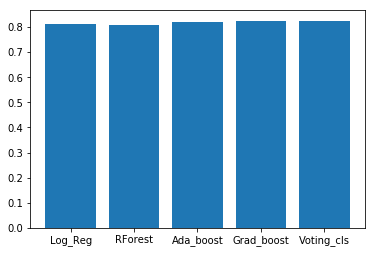

In [251]:
##plotting accuracy of each model

model_names = ['Log_Reg', 'RForest', 'Ada_boost', 'Grad_boost', 'Voting_cls']
index = np.arange(len(model_names))
plt.bar(index, accuracy_list, align = 'center')
plt.xticks(index, model_names)

##the ensemble models seems to do better


([<matplotlib.axis.XTick at 0x28b605770b8>,
 <a list of 5 Text xticklabel objects>)

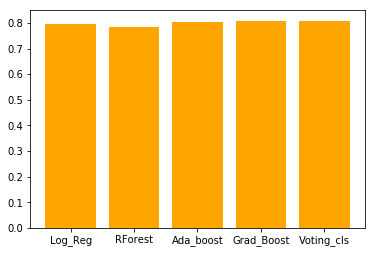

In [261]:
##comparing precision

model_names = ['Log_Reg', 'RForest', 'Ada_boost', 'Grad_Boost', 'Voting_cls']

index = np.arange(len(model_names))

plt.bar(index, precision_list, align = 'center', color = 'orange')
plt.xticks(index, model_names)

##again ensemble models seem to do better

([<matplotlib.axis.XTick at 0x28b5fe462b0>,
 <a list of 5 Text xticklabel objects>)

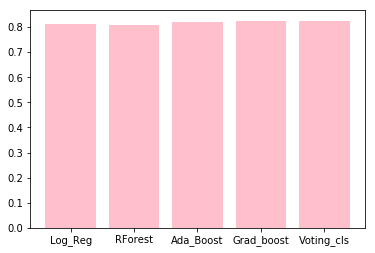

In [257]:
##comparimg recall


labels = ['Log_Reg', 'RForest', 'Ada_Boost', 'Grad_boost', 'Voting_cls']

index = np.arange(len(labels))

plt.bar(index, recall_list, align = 'center', color =  'pink')
plt.xticks(index, labels)

([<matplotlib.axis.XTick at 0x28b605ada58>,
 <a list of 5 Text xticklabel objects>)

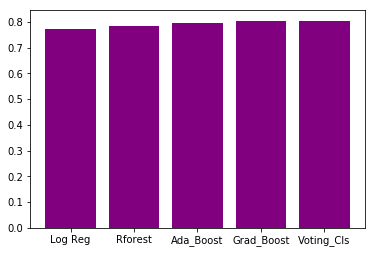

In [264]:
#comparing f1 scores

labels = ['Log Reg', 'Rforest', 'Ada_Boost', 'Grad_Boost', 'Voting_Cls']
index  = np.arange(len(labels))

plt.bar(index, f1_list, align = 'center', color = 'purple')
plt.xticks(index, labels)

In [ ]:
## so across all the important classification metrics , ensemble models show most promise as they perform better than 
## the benchmark log reg model.

##among the ensemble methods , grad boost and voting cls have consistently high scores across all metrics

In [ ]:
##now we can fine tune the promisimg models =  gradient boost and voting cls 

#Tuning hyperparamters - using grid search cv

#hyperparameters considered 
#n_estimators - no of decision trees
#max_sample_splits - min no of samples req in a node for splitting (to avoid issues of overfitting)

##hyper parameters are set before learning.
#now that we know which models do well, lets make new instance of the model and find the hyper paramters by 
#gridsearccv on train data.

##once we have that, we can predict on the test data

In [272]:
from sklearn.grid_search import GridSearchCV

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.ensemble import VotingClassifier

In [273]:
grad_boost_cls_1= GradientBoostingClassifier(random_state= 42)

In [274]:
grad_boost_para = {'n_estimators':[15, 25, 50], 
                   'min_samples_split':[3, 10, 15]}

In [275]:
grid_grad_boost_cls_1= GridSearchCV(grad_boost_cls_1, grad_boost_para, cv =10, scoring= 'accuracy')

In [276]:
grid_grad_boost_cls_1.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [15, 25, 50], 'min_samples_split': [3, 10, 15]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [277]:
#best para for grad boost
grid_grad_boost_cls_1.best_params_

{'min_samples_split': 3, 'n_estimators': 25}

In [280]:
#best grad boost model
final_grad_boost_model= grid_grad_boost_cls_1.best_estimator_
final_grad_boost_model

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=3,
              min_weight_fraction_leaf=0.0, n_estimators=25,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False)

In [ ]:
##for voting cls consisting of randforest, adaboost and gradboost, we need best paramters for each and then we can use 
##that in  the voting cls

In [281]:
rf_cls_1= RandomForestClassifier(random_state= 42)

In [282]:
rf_boost_para = {'n_estimators':[15, 25, 50], 
                   'min_samples_split':[3, 10, 15]}

In [283]:
grid_rf_cls_1 = GridSearchCV(rf_cls_1,rf_boost_para, cv =10 , scoring= 'accuracy' )

In [284]:
grid_rf_cls_1.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [15, 25, 50], 'min_samples_split': [3, 10, 15]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [285]:
#random forest best classifiers

grid_rf_cls_1.best_params_

{'min_samples_split': 15, 'n_estimators': 50}

In [286]:
final_rf_cls = grid_rf_cls_1.best_estimator_

In [287]:
final_rf_cls

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=15,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [ ]:
##final ada model

In [288]:
adaboost_cls_1 = AdaBoostClassifier(random_state= 42)

In [289]:
ada_para  = {'n_estimators':[15, 25, 50]}

In [290]:
grid_adaboost_cls= GridSearchCV(adaboost_cls_1, ada_para,cv =10 , scoring= 'accuracy')

In [291]:


grid_adaboost_cls.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=42),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [15, 25, 50]}, pre_dispatch='2*n_jobs',
       refit=True, scoring='accuracy', verbose=0)

In [292]:
#best parameters for ada boost

grid_adaboost_cls.best_params_

{'n_estimators': 15}

In [295]:
final_ada_model= grid_adaboost_cls.best_estimator_

final_ada_model

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=15, random_state=42)

In [298]:
##calibrating the classifiers.



In [ ]:
#http://scikit-learn.org/stable/modules/calibration.html

#When performing classification you often want not only to predict the class label, 
#but also obtain a probability of the respective label. This probability gives you some kind of confidence
#on the prediction. 
#Some models can give you poor estimates of the class probabilities 
#and some even do not support probability prediction. 
#The calibration module allows you to better calibrate the probabilities of a given model, 
#or to add support for probability prediction.



#Well calibrated classifiers are probabilistic classifiers for which 
#the output of the predict_proba method can be directly interpreted as a confidence level.

    
#For instance, a well calibrated (binary) classifier should classify the samples such that 
#among the samples to which it gave a predict_proba value close to 0.8,
#approximately 80% actually belong to the positive class. 

#http://queirozf.com/entries/introduction-to-auc-and-calibrated-models-with-examples-using-scikit-learn


#Calibration: How well model output actually matches the probability of the event. 
#It can be measured by the Hosmer-Lemeshow statistic.






#The score you get from a binary classifier (that outputs a number between 0 and 1)
#is not necessarily a well-calibrated probability.

#This is not always a problem because it generally sufices to have 
#scores that correctly order the samples, 
#even if they don't actually correspond to probabilities.





#Calibrate a discrete classifier using CalibratedClassifierCV
#CalibratedClassifierCV to turn a discrete
#binary classifier into one that outputs well-calibrated continous probabilities.

#Calibrate a continous classifier using CalibratedClassifierCV
#Even if a model does output continuous numbers from 0 to 1 out of the box 
#(i.e. it supports predict_proba) that doesn't mean that you can blindly use these scores as probabilities.

#GradientBoostingClassifier already supports predict_proba but that
#doesn't mean that its outputs are well calibrated. 


#A logistic regression binary classifier naturally produces scores that are actual probabilities 
#(i.e. if it reports a score of 0.9 for an instance, 
#it means that that instance would be True 90% of the time and False 10% of the time.)



##decision tree also gives the class probabilities that a instance belongs to
##new instance ---> class 0 prob 0.2 , class 1 prob 0.7

# when asked to predict class  of this new instance, it outputs class of highest prob ..here class 1


In [304]:
##Use the above best parameter values for the estimators within our Weighted voting CLassifier

## we cant use the best models directly for calibration since they have been fit on the train data once
##calibration requires the model to have not seen the data, so we just make new instance of the best models 
##since we have the best parameters, this is easy


#tuned models
vc_rf = RandomForestClassifier(min_samples_split= 15, n_estimators= 50, random_state= 42)
vc_ada= AdaBoostClassifier(n_estimators= 15, random_state= 42)
vc_grad = GradientBoostingClassifier(min_samples_split= 3, n_estimators= 25, random_state= 42)

In [305]:
from sklearn.calibration import CalibratedClassifierCV

clab_rf_cls= CalibratedClassifierCV(vc_rf, method= 'isotonic', cv =10)

In [306]:
clab_rf_cls

CalibratedClassifierCV(base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=15,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
            cv=10, method='isotonic')

In [307]:
final_rf_cls

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=15,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [ ]:
##so basically the calibrated rf cls will have better performance than final_rf_cls which is not calibrated

In [308]:
clab_grad_cls= CalibratedClassifierCV(vc_grad, method = 'isotonic',cv =10)

In [309]:
clab_ada_cls= CalibratedClassifierCV(vc_ada, method = 'isotonic', cv =10)

In [ ]:
##these calibrated estimators can now go into the voting classifier

In [316]:
vc_final_clab= VotingClassifier(estimators= [('cl_rf', clab_rf_cls), ('cl_ada', clab_ada_cls), ('cl_grad', clab_grad_cls)], voting= 'soft')

In [317]:
vc_final_clab.fit(X_train_scaled, y_train)

VotingClassifier(estimators=[('cl_rf', CalibratedClassifierCV(base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1..., subsample=1.0, verbose=0,
              warm_start=False),
            cv=10, method='isotonic'))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None)

In [318]:
vc_y_predict= vc_final_clab.predict(X_test_scaled)

In [319]:
##voting classifier final score  - 81% accuracy on test set

from sklearn.metrics import accuracy_score

accuracy_score(y_test, vc_y_predict)

0.81122222222222218

In [320]:
precision_score(y_test, vc_y_predict, average= 'weighted')

0.79483988470627898

In [321]:
f1_score(y_test, vc_y_predict, average= 'weighted')

0.78635275735783339

In [322]:
##tuned grad boosted model

vc_grad


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=3,
              min_weight_fraction_leaf=0.0, n_estimators=25,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False)

In [323]:
vc_grad.fit(X_train_scaled, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=3,
              min_weight_fraction_leaf=0.0, n_estimators=25,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False)

In [324]:
grad_y_predict = vc_grad.predict(X_test_scaled)

In [325]:
##accuracy of grad boost on test set

accuracy_score(y_test,grad_y_predict )

0.81122222222222218

In [327]:
f1_score(y_test,grad_y_predict, average= 'weighted'  )

0.78621531981113479

In [329]:
#benchmark log reg model performance on test set

log_reg_final_x = LogisticRegression(random_state=42)

In [330]:
log_reg_final_x.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [331]:
log_reg_y_predict= log_reg_final_x.predict(X_test_scaled)

In [332]:
accuracy_score(y_test,log_reg_y_predict)

0.79900000000000004

In [333]:
f1_score(y_test,log_reg_y_predict,average= 'weighted')

0.75452496706228078

In [ ]:
##so voting classifier(soft) and the tuned grad boost classifier have very similar performance


##voting classifier final score  - 81.12% accuracy on test set
##f1 score  - 78.63%

####grad boost classifier  - 81% accuracy on test set

###f1_score - 78.62%

##but training time for grad boost was quicker than voting classifier, so that probably makes sense for a final model

##comparing with the benchmark log regression model

# log reg - accuracy_score(y_test,log_reg_y_predict) -78%
##f1 score 75%


##so choosen model grad boost is better than the benchmark model


In [ ]:
## Conclusion:

## The end goal of the project was to come up with a robust and optimal model, that performs across all metrics 
## not just accuracy

##suggested improvements:

##using XGboost
##undersampling to balance out the class imbalance



#https://stackoverflow.com/questions/34042850/what-is-the-advantage-of-using-weighted-average-f-measure-in-weka
#also:

#Also used weighted precision and recall, because I care how the classifier performs on both classes - default and non default

